# M小白实验室
第一期： 玩转Labo——Labo操控电脑

- Pillow 用于截屏与图形处理
- numpy 用于科学计算
- autopy/pywin32 用于模拟键盘鼠标

## 1. 截屏

In [2]:
from PIL import ImageGrab
import numpy as np

# 截取图片
# 第一个参数 开始截图的x坐标
# 第二个参数 开始截图的y坐标
# 第三个参数 结束截图的x坐标
# 第四个参数 结束截图的y坐标
box = (160, 100, 460, 480) 
img = ImageGrab.grab(box) 

# 转为灰度图
img = img.convert('L')  

# 转化为array
imgArray = np.array(img)/255

In [3]:
# 查看图片的数值 数值越大越亮
imgArray

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.96862745, 0.96862745,
        0.96862745],
       [1.        , 1.        , 1.        , ..., 0.96862745, 0.96862745,
        0.96862745],
       [1.        , 1.        , 1.        , ..., 0.96862745, 0.96862745,
        0.96862745]])

In [4]:
# 旧方法 已经无用
# 本代码块用于获取当前目录下所有jpg图片名称
# 并载入图片

# import os

# path = os.listdir(os.getcwd())

# jpgList = []
# for p in path:
#     if p.split('.')[-1]=='jpg':
#         jpgList.append(p)
# jpgList

# from skimage import io

# # 这里根据获取图片方式而异
# # 笔者使用bandicam截图软件，默认截图名字有时间戳
# # 导入图片时自动根据时间排序
# # 因此最后一个必定为最新的截图
# # 只读取最后一个图片即可
# jpgURL = jpgList[-1]  

# # 获取图片，并转为灰度图
# img=io.imread(jpg,as_grey=True) 
# io.imshow(img)

## 2. 获取图片中指定N个区域的明亮程度与编码

In [5]:
imgY,imgX = imgArray.shape

In [6]:
totalAera = 4   # 划分几个区域识别 这里设置4个  图像横向切开 4个区域纵向排列
aera = [0]*totalAera  # 初始化区域列表

In [10]:
# 确定各个区域的明暗程度

stepY = int(imgY/totalAera)
uncodeKey = []  # 非编码
codekey = 0     # 编码
for i in range(totalAera):
    aera[i] = imgArray[stepY*i:stepY*(i+1)].mean()
    if aera[i]>0.5:
        codekey += 2**i
        print("第%s个区域是白色，亮度为%s" % (i+1,aera[i]))
        uncodeKey.append(str(i+1))
    else:
        print("第%s个区域是黑色，亮度为%s" % (i+1,aera[i]))
        
print("\n编码情况下 按下的键的编号为%s" % codekey)
print("\n非编码下 按下的键的编号为%s" % (" ".join(uncodeKey)))

第1个区域是白色，亮度为0.9504624699002409
第2个区域是白色，亮度为0.9332919160646717
第3个区域是白色，亮度为0.9418006191950465
第4个区域是白色，亮度为0.9539076711386308

编码情况下 按下的键的编号为15

非编码下 按下的键的编号为1 2 3 4


## 3. 将获取的内容输入到html文件中（用于展示中间结果）

In [37]:
with open('./index.html','r',encoding='UTF-8') as f:
    string = f.read()
    
print("修改前：")
print(string)
print("\n修改后：")
stringNew = re.sub('<p>(.*)</p>','<p>按下键的值为：%s</p>' % codekey,string)
print(stringNew)

with open('./index.html','w',encoding='UTF-8') as f:
    f.write(stringNew)

读取：
<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="utf-8" />
    <meta http-equiv="refresh" content="1">
    <meta name="author" content="M小白">
    <title>【M小白实验室】 花式玩转Labo</title>
</head>
<body>
    <p>按下键的值为：1</p>
</body>
</html>

修改后：
<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="utf-8" />
    <meta http-equiv="refresh" content="1">
    <meta name="author" content="M小白">
    <title>【M小白实验室】 花式玩转Labo</title>
</head>
<body>
    <p>按下键的值为：15</p>
</body>
</html>


In [7]:
# 旧方法 已经无用
# from bs4 import BeautifulSoup
# soup = BeautifulSoup(open("./index.html",'r',encoding='UTF-8'), 'html.parser')
# soup.select("p")

## 4.键盘鼠标模拟操作

- [Autopy官方文档](https://www.autopy.org/documentation/api-reference/)
autopy有点坑，笔者目前不知道其键盘模拟如何实现

- [安装pywin32方法](https://jingyan.baidu.com/article/bad08e1ed173d409c85121f8.html)
直接用pip安装pywin32的时候各位可能会出现报错

- [使用pywin32实现按键模拟](https://blog.csdn.net/smallsmallmouse/article/details/78689675)
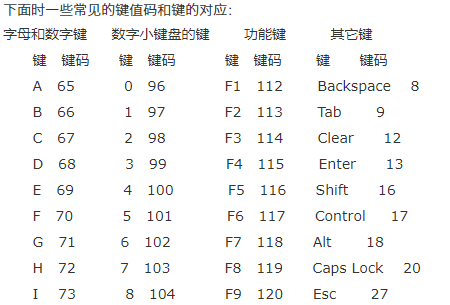

In [11]:
import autopy
import win32api
import win32con

In [12]:
autopy.mouse.move(100, 100) # 移动鼠标
autopy.mouse.smooth_move(300, 300) # 平滑移动鼠标（上面那个是瞬间的）
 
autopy.mouse.click() # 单击
win32api.keybd_event(65,0,0,0)  #A键位码是65